# Data Visualization - Python Portion

## Data Cleaning and Transformation: Gabriel's Section

### Importing Libraries

In [ ]:
#@title

# Import packages

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import re



### Data cleaning and preprocessing UN dataset

In [ ]:
#@title

#Load dataset


url="https://github.com/angelhumano/data_visualization_class_project/blob/main/destination_origen_UN_2020_migrant_stock_before_preprocessing.csv?raw=true"

df = pd.read_csv(url, skiprows=9)


<ipython-input-699-a0dab1c2bfc7>:8: DtypeWarning: Columns (0,2,3,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, skiprows=9)


In [ ]:
#@title
df1 = df.copy()
df1.shape

(37052, 28)

In [ ]:
#@title
df1.head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,Index,"Region, development group, country or area of ...",Notes of destination,Location code of destination,Type of data of destination,"Region, development group, country or area of ...",Location code of origin,1990,1995,2000,...,2010,2015,2020,1990,1995,2000,2005,2010,2015,2020
1,1,WORLD,NaN,900,NaN,WORLD,900,152 986 157,161 289 976,173 230 585,...,113 940 881,128 238 058,145 655 844,75 422 690,79 708 475,85 510 752,93 783 747,107 042 306,119 720 586,134 942 261
2,2,WORLD,NaN,900,NaN,Sub-Saharan Africa,947,15 334 807,16 488 973,15 638 014,...,10 531 120,12 578 348,14 732 802,7 197 963,7 811 167,7 391 439,8 047 927,9 411 604,11 618 863,13 551 736
3,3,WORLD,NaN,900,NaN,Northern Africa and Western Asia,1833,16 365 218,18 069 437,19 437 054,...,14 249 463,18 177 303,20 941 050,7 535 205,8 240 176,8 700 647,9 770 550,11 064 248,14 428 744,16 622 770
4,4,WORLD,NaN,900,NaN,Central and Southern Asia,921,31 104 020,29 069 983,30 897 694,...,24 444 167,27 971 106,31 211 577,14 049 348,13 027 520,13 718 322,14 451 806,16 638 221,18 510 024,20 017 972
5,5,WORLD,NaN,900,NaN,Eastern and South-Eastern Asia,1832,14 774 419,17 860 923,21 440 854,...,15 130 964,17 150 433,18 801 912,7 359 668,8 999 164,10 940 422,13 069 932,15 846 242,18 055 157,19 598 828
6,6,WORLD,NaN,900,NaN,Latin America and the Caribbean,1830,15 273 399,19 669 704,24 628 700,...,16 857 618,17 582 139,20 697 275,7 728 710,9 943 541,12 446 161,14 842 839,17 780 032,18 623 861,22 193 206
7,7,WORLD,NaN,900,NaN,Oceania (excluding Australia and New Zealand),1835,272 517,313 061,375 176,...,214 866,240 815,273 803,138 894,160 703,191 857,208 246,227 037,254 405,291 478
8,8,WORLD,NaN,900,NaN,Australia and New Zealand,927,689 030,758 234,871 660,...,573 939,622 696,693 842,353 679,391 525,450 533,502 354,575 326,633 506,711 082
9,9,WORLD,NaN,900,NaN,Europe and Northern America,1829,50 532 413,51 582 164,52 877 703,...,27 337 252,28 229 706,31 770 385,26 827 879,27 433 406,28 201 599,29 166 292,31 343 852,32 362 696,35 831 236


### Rename columns

In [ ]:
 #@title
#Assign column names
df1.columns = list(df1.iloc[0])
list(df1.columns)

['Index',
 'Region, development group, country or area of destination',
 'Notes of destination',
 'Location code of destination',
 'Type of data of destination',
 'Region, development group, country or area of origin',
 'Location code of origin',
 '1990',
 '1995',
 '2000',
 '2005',
 '2010',
 '2015',
 '2020',
 '1990',
 '1995',
 '2000',
 '2005',
 '2010',
 '2015',
 '2020',
 '1990',
 '1995',
 '2000',
 '2005',
 '2010',
 '2015',
 '2020']

### Delete columns that we do not need

In [ ]:
 #@title
# Delete the columns that we do not need

#Select years for both sexes and drop

df1 = df1.iloc[1:,1:14]

#Reset index
df1.reset_index(drop=True, inplace= True)
df1.head(5)

#https://sparkbyexamples.com/pandas/pandas-drop-multiple-columns-by-index/
#https://stackoverflow.com/a/61661270/15333580

,"Region, development group, country or area of destination",Notes of destination,Location code of destination,Type of data of destination,"Region, development group, country or area of origin",Location code of origin,1990,1995,2000,2005,2010,2015,2020
0,WORLD,NaN,900,NaN,WORLD,900,152 986 157,161 289 976,173 230 585,191 446 828,220 983 187,247 958 644,280 598 105
1,WORLD,NaN,900,NaN,Sub-Saharan Africa,947,15 334 807,16 488 973,15 638 014,17 274 985,19 942 724,24 197 211,28 284 538
2,WORLD,NaN,900,NaN,Northern Africa and Western Asia,1833,16 365 218,18 069 437,19 437 054,21 867 791,25 313 711,32 606 047,37 563 820
3,WORLD,NaN,900,NaN,Central and Southern Asia,921,31 104 020,29 069 983,30 897 694,33 347 690,41 082 388,46 481 130,51 229 549
4,WORLD,NaN,900,NaN,Eastern and South-Eastern Asia,1832,14 774 419,17 860 923,21 440 854,25 556 983,30 977 206,35 205 590,38 400 740


### Remove regions and leave only countries

In [ ]:
 #@title
#Remove regions and leave only countries
df1 = df1[df1["Type of data of destination"].notna()]

#drop columns "notes of destination" and "type of data of destination"

df1 = df1.drop(df1.columns[[1,2,3,5]],axis = 1)
print(F"dataframe shape = {df1.shape}")


dataframe shape = (23323, 9)


In [ ]:
#@title
# Rename columns
cols = ["destination", "origin","1990","1995","2000","2005","2010","2015","2020"]
df1= df1.rename(columns=dict(zip(df1.columns,cols)))
df1


,destination,origin,1990,1995,2000,2005,2010,2015,2020
6509,Burundi,WORLD,333 110,254 853,125 628,192 774,247 321,298 299,344 767
6510,Burundi,Sub-Saharan Africa,272 528,213 186,111 209,175 242,226 957,270 062,311 754
6511,Burundi,Northern Africa and Western Asia,..,..,..,..,..,..,..
6512,Burundi,Central and Southern Asia,..,..,..,..,..,..,..
6513,Burundi,Eastern and South-Eastern Asia,..,..,..,..,..,..,..
...,...,...,...,...,...,...,...,...,...
37046,Wallis and Futuna Islands*,French Polynesia*,18,23,28,32,19,15,10
37047,Wallis and Futuna Islands*,Mayotte*,35,44,52,58,41,38,27
37048,Wallis and Futuna Islands*,New Caledonia*,843,975,1 152,1 207,1 093,1 021,1 021
37049,Wallis and Futuna Islands*,Vanuatu,152,165,195,197,138,72,67


In [ ]:
#@title
# Get a list of all countries in the dataset and delete and use to delete the rows that still have regions in the dataset
dest = sorted(df1["destination"].unique())


In [ ]:
#@title
# Remove rows with regions in the column origin
df2 = df1[df1["origin"].isin(dest)]
df2

,destination,origin,1990,1995,2000,2005,2010,2015,2020
6557,Burundi,Belgium,642,621,475,466,497,605,718
6558,Burundi,Democratic Republic of the Congo,36 654,41 447,37 951,99 099,147 611,175 768,199 585
6559,Burundi,France*,321,310,237,232,248,302,358
6560,Burundi,Kenya,186,216,202,502,847,1 032,1 226
6561,Burundi,Rwanda,221 943,160 197,66 415,61 104,54 794,64 363,76 567
...,...,...,...,...,...,...,...,...,...
37045,Wallis and Futuna Islands*,France*,327,461,545,646,795,877,889
37046,Wallis and Futuna Islands*,French Polynesia*,18,23,28,32,19,15,10
37047,Wallis and Futuna Islands*,Mayotte*,35,44,52,58,41,38,27
37048,Wallis and Futuna Islands*,New Caledonia*,843,975,1 152,1 207,1 093,1 021,1 021


### Check deleted regions

In [ ]:
#@title
#Let us check what we just deleted
d = df1[~df1['origin'].isin(dest)]
sorted(d["origin"].unique())

['  Australia and New Zealand',
 '  Caribbean',
 '  Central America',
 '  Central Asia',
 '  Central and Southern Asia',
 '  Developed regions',
 '  Eastern Africa',
 '  Eastern Asia',
 '  Eastern Europe',
 '  Eastern and South-Eastern Asia',
 '  Europe and Northern America',
 '  High-income countries',
 '  Land-locked Developing Countries (LLDC)',
 '  Latin America and the Caribbean',
 '  Least developed countries',
 '  Less developed regions',
 '  Low-income countries',
 '  Melanesia',
 '  Micronesia',
 '  Middle Africa',
 '  Middle-income countries',
 '  Northern Africa',
 '  Northern Africa and Western Asia',
 '  Northern Europe',
 '  Oceania (excluding Australia and New Zealand)',
 '  Polynesia*',
 '  Small island developing States (SIDS)',
 '  South America',
 '  South-Eastern Asia',
 '  Southern Africa',
 '  Southern Asia',
 '  Southern Europe',
 '  Sub-Saharan Africa',
 '  Western Africa',
 '  Western Asia',
 '  Western Europe',
 ' AFRICA',
 ' ASIA',
 ' EUROPE',
 ' LATIN AMERIC

In [ ]:
#@title
# There is a difference of one country between destination and origin countries. Let us explore this issue
print(len(list(df2["destination"].unique())))
print(len(list(df2["origin"].unique())))


231
232


In [ ]:
#@title
# Let us check which country why there is a extra value for origin
list1 = list(df2["destination"].unique())
list2 = list(df2["origin"].unique())

main_list = list(set(list2) - set(list1))
print(main_list)

#https://stackoverflow.com/a/41125943/15333580

['   Holy See*']


In [ ]:
#@title
# Since most values are empty and most destinations where region. We will remove Holy See*
df2[df2["origin"] == '   Holy See*']

,destination,origin,1990,1995,2000,2005,2010,2015,2020
18441,Bulgaria,Holy See*,..,..,..,..,..,1,..
19827,Slovakia,Holy See*,..,..,..,..,..,3,2
20715,Estonia,Holy See*,..,..,..,..,1,1,..
21020,Finland*,Holy See*,..,..,..,..,1,1,..
23583,Greece,Holy See*,2,5,8,4,..,..,..
23878,Italy,Holy See*,8,21,33,106,173,298,166
27143,Switzerland,Holy See*,..,..,..,..,..,6,6


In [ ]:
#@title
# Let us remove it
des = sorted((df2["destination"].unique()))
df3= df2[df2['origin'].isin(des)]

print(len(list(df3["destination"].unique())))
print(len(list(df3["origin"].unique())))


231
231


### Reshape DataFrame from wide to long (ideal format for Tableau)

In [ ]:
#@title
df4 = pd.melt(df3, id_vars=["destination", "origin"], value_vars=["1990", "1995","2000", "2005", "2010", "2015", "2020"],
        var_name='year', value_name='migrant_stock')

df4
#https://pandas.pydata.org/docs/reference/api/pandas.melt.html

,destination,origin,year,migrant_stock
0,Burundi,Belgium,1990,642
1,Burundi,Democratic Republic of the Congo,1990,36 654
2,Burundi,France*,1990,321
3,Burundi,Kenya,1990,186
4,Burundi,Rwanda,1990,221 943
...,...,...,...,...
83666,Wallis and Futuna Islands*,France*,2020,889
83667,Wallis and Futuna Islands*,French Polynesia*,2020,10
83668,Wallis and Futuna Islands*,Mayotte*,2020,27
83669,Wallis and Futuna Islands*,New Caledonia*,2020,1 021


### Clean the final dataset

In [ ]:
#@title
#Clean new dataset
df_clean = df4.copy()
df_clean

,destination,origin,year,migrant_stock
0,Burundi,Belgium,1990,642
1,Burundi,Democratic Republic of the Congo,1990,36 654
2,Burundi,France*,1990,321
3,Burundi,Kenya,1990,186
4,Burundi,Rwanda,1990,221 943
...,...,...,...,...
83666,Wallis and Futuna Islands*,France*,2020,889
83667,Wallis and Futuna Islands*,French Polynesia*,2020,10
83668,Wallis and Futuna Islands*,Mayotte*,2020,27
83669,Wallis and Futuna Islands*,New Caledonia*,2020,1 021


In [ ]:
#@title
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83671 entries, 0 to 83670
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   destination    83671 non-null  object
 1   origin         83671 non-null  object
 2   year           83671 non-null  object
 3   migrant_stock  83671 non-null  object
dtypes: object(4)
memory usage: 2.6+ MB


In [ ]:
#@title

#Remove * symbol from countries and the white spaces at the beginning and end of each string

#Clean origen
df_clean['origin'] = df_clean['origin'].replace({'\*': '', '\"': ''}, regex=True).str.strip()

#Clean destination
df_clean['destination'] = df_clean['destination'].replace({'\*': '', '\"': ''}, regex=True).str.strip()


#https://pbpython.com/currency-cleanup.html


# Convert migrant_stock to integer
s = df_clean['migrant_stock'] = df_clean['migrant_stock'].replace({' ': ''}, regex=True)


df_clean['migrant_stock']= pd.to_numeric(s, errors='coerce').astype('Int64')


#https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html

### Check the cleaned dataframe

In [ ]:
#@title
# Check the df_clean

df_clean[["destination", "origin", "year"]].describe().T

,count,unique,top,freq
destination,83671,231,Australia,1484
origin,83671,231,United States of America,1134
year,83671,7,1990,11953


In [ ]:
#@title
df_clean["migrant_stock"].describe().T

count          75580.0
mean      18062.413085
std      150763.148166
min                1.0
25%               45.0
50%              310.0
75%             2571.0
max         12168662.0
Name: migrant_stock, dtype: Float64

<Axes: >

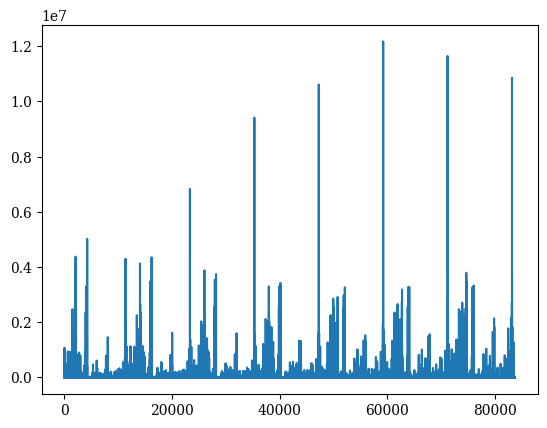

In [ ]:
#@title
df_clean["migrant_stock"].plot()

### Cleaned country names

In [ ]:
#@title
list1 = sorted(df_clean["destination"].unique())
list2 =  sorted(df_clean["origin"].unique())

countries = pd.DataFrame(
    {"destination": list1,
     "origin": list2
     })

countries


,destination,origin
0,Afghanistan,Afghanistan
1,Albania,Albania
2,Algeria,Algeria
3,American Samoa,American Samoa
4,Andorra,Andorra
...,...,...
226,Wallis and Futuna Islands,Wallis and Futuna Islands
227,Western Sahara,Western Sahara
228,Yemen,Yemen
229,Zambia,Zambia


### Final DataFrame

In [ ]:
#@title
df_clean

,destination,origin,year,migrant_stock
0,Burundi,Belgium,1990,642
1,Burundi,Democratic Republic of the Congo,1990,36654
2,Burundi,France,1990,321
3,Burundi,Kenya,1990,186
4,Burundi,Rwanda,1990,221943
...,...,...,...,...
83666,Wallis and Futuna Islands,France,2020,889
83667,Wallis and Futuna Islands,French Polynesia,2020,10
83668,Wallis and Futuna Islands,Mayotte,2020,27
83669,Wallis and Futuna Islands,New Caledonia,2020,1021


### Check for missing values

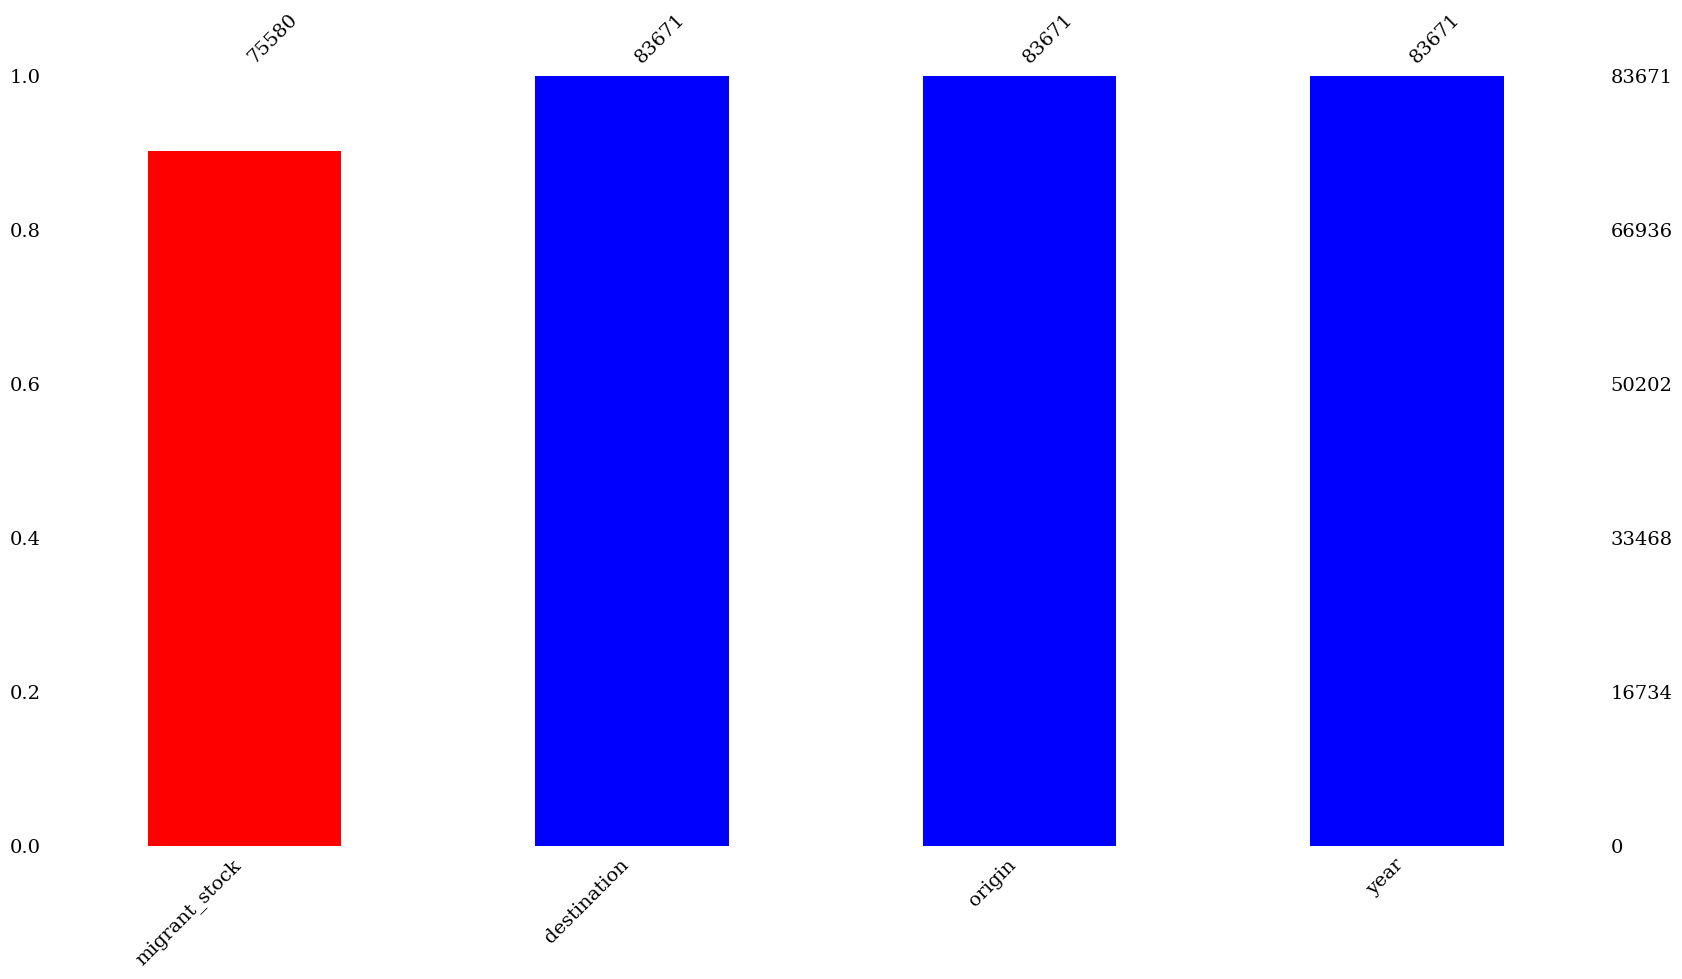

In [ ]:
#@title
m= msno.bar(df_clean, sort="ascending", figsize=(20,10), fontsize=14,
            color =["red", "blue","blue", "blue" ] )
plt.show()

### Remove missing values

In [ ]:
#@title

df_clean = df_clean[~df_clean['migrant_stock'].isnull()]
df_clean.shape

(75580, 4)

### Export to CSV file UN_dest_ori_migrant_stock_2020_clean.csv

In [ ]:
#@title
from google.colab import files

df_clean.to_csv("UN_dest_ori_migrant_stock_2020_clean.csv", index = False, encoding = 'utf-8-sig')
# remove comment to download dataset
files.download("UN_dest_ori_migrant_stock_2020_clean.csv")


#https://cyublog.com/articles/python-en/colab-pandas-three-ways-to-save-dataframe-data/

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Data cleaning and preprocessing World indicators dataset


In [ ]:
#@title
url2 = "https://github.com/angelhumano/data_visualization_class_project/blob/main/wolrd_development_indicators_47_before_preprocessing.csv?raw=true"


In [ ]:
#@title
df1 = pd.read_csv(url2)

In [ ]:
#@title
df1

,Country Name,Year,Adjusted net national income per capita (annual % growth) [NY.ADJ.NNTY.PC.KD.ZG],Bribery incidence (% of firms experiencing at least one bribe payment request) [IC.FRM.BRIB.ZS],CO2 emissions (kg per PPP $ of GDP) [EN.ATM.CO2E.PP.GD],CO2 emissions (metric tons per capita) [EN.ATM.CO2E.PC],"Droughts, floods, extreme temperatures (% of population, average 1990-2009) [EN.CLC.MDAT.ZS]",CPIA property rights and rule-based governance rating (1=low to 6=high) [IQ.CPA.PROP.XQ],"CPIA transparency, accountability, and corruption in the public sector rating (1=low to 6=high) [IQ.CPA.TRAN.XQ]","Compulsory education, duration (years) [SE.COM.DURS]",...,Population growth (annual %) [SP.POP.GROW],"Population, total [SP.POP.TOTL]",Poverty headcount ratio at national poverty lines (% of population) [SI.POV.NAHC],"Primary education, duration (years) [SE.PRM.DURS]","Secondary education, duration (years) [SE.SEC.DURS]",Strength of legal rights index (0=weak to 12=strong) [IC.LGL.CRED.XQ],Total greenhouse gas emissions (kt of CO2 equivalent) [EN.ATM.GHGT.KT.CE],Trade (% of GDP) [NE.TRD.GNFS.ZS],"Unemployment, total (% of total labor force) (national estimate) [SL.UEM.TOTL.NE.ZS]","Unemployment, youth total (% of total labor force ages 15-24) (national estimate) [SL.UEM.1524.NE.ZS]"
0,Afghanistan,1990,..,..,..,0.191745115,..,..,..,..,...,4.47695438,12412311,..,6,6,..,11970,..,..,..
1,Afghanistan,1991,..,..,..,0.1676815788,..,..,..,..,...,6.900124486,13299016,..,6,6,..,12199.99981,..,..,..
2,Afghanistan,1992,..,..,..,0.09595774214,..,..,..,..,...,8.546107005,14485543,..,6,6,..,11420.00008,..,..,..
3,Afghanistan,1993,..,..,..,0.08472111043,..,..,..,..,...,8.790896707,15816601,..,6,6,..,11500,..,..,..
4,Afghanistan,1994,..,..,..,0.07554582739,..,..,..,..,...,7.659795534,17075728,..,6,6,..,11539.99996,..,..,..
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6939,Zimbabwe,2017,1.972763753,..,0.3006134311,0.7262970709,..,2,2,7,...,1.459405813,14236599,30.4,7,6,5,28299.99924,50.02971226,..,..
6940,Zimbabwe,2018,-6.708681629,..,0.3353463132,0.8574112686,..,2,2.5,7,...,1.410381542,14438812,..,7,6,5,30829.99992,69.44702132,..,..
6941,Zimbabwe,2019,..,..,0.3334414884,0.8029785196,..,2,2.5,7,...,1.421141886,14645473,38.3,7,6,6,30530.00069,63.28191518,7.369999886,11.85999966
6942,Zimbabwe,2020,..,..,..,..,..,2,2.5,7,...,1.473871416,14862927,..,7,6,..,..,76.00193836,..,..


In [ ]:
#@title
# Replace ".." for np.nan
df1 = df1.replace("..", np.nan)

In [ ]:
#@title
df2 = df1.copy()
df2.shape

(6944, 49)

In [ ]:
#@title
# Remove brackets from column names
df2.columns = [re.sub("\[.*?\]","",col) for col in df2.columns]

#https://stackoverflow.com/a/72936077/15333580
#https://stackoverflow.com/a/72936077/15333580

# Trim white spaces
df2.columns = df2.columns.str.strip()



### Sorted column names

In [ ]:
#@title
sorted(df2.columns)

['Adjusted net national income per capita (annual % growth)',
 'Bribery incidence (% of firms experiencing at least one bribe payment request)',
 'CO2 emissions (kg per PPP $ of GDP)',
 'CO2 emissions (metric tons per capita)',
 'CPIA property rights and rule-based governance rating (1=low to 6=high)',
 'CPIA transparency, accountability, and corruption in the public sector rating (1=low to 6=high)',
 'Compulsory education, duration (years)',
 'Consumer price index (2010 = 100)',
 'Country Name',
 'Droughts, floods, extreme temperatures (% of population, average 1990-2009)',
 'GDP (current US$)',
 'GDP growth (annual %)',
 'GDP per capita growth (annual %)',
 'GDP per capita, PPP (current international $)',
 'Gini index',
 'Government expenditure on education, total (% of GDP)',
 'Government expenditure on education, total (% of government expenditure)',
 'Human capital index (HCI) (scale 0-1)',
 'Inflation, consumer prices (annual %)',
 'Intentional homicides (per 100,000 people)',
 '

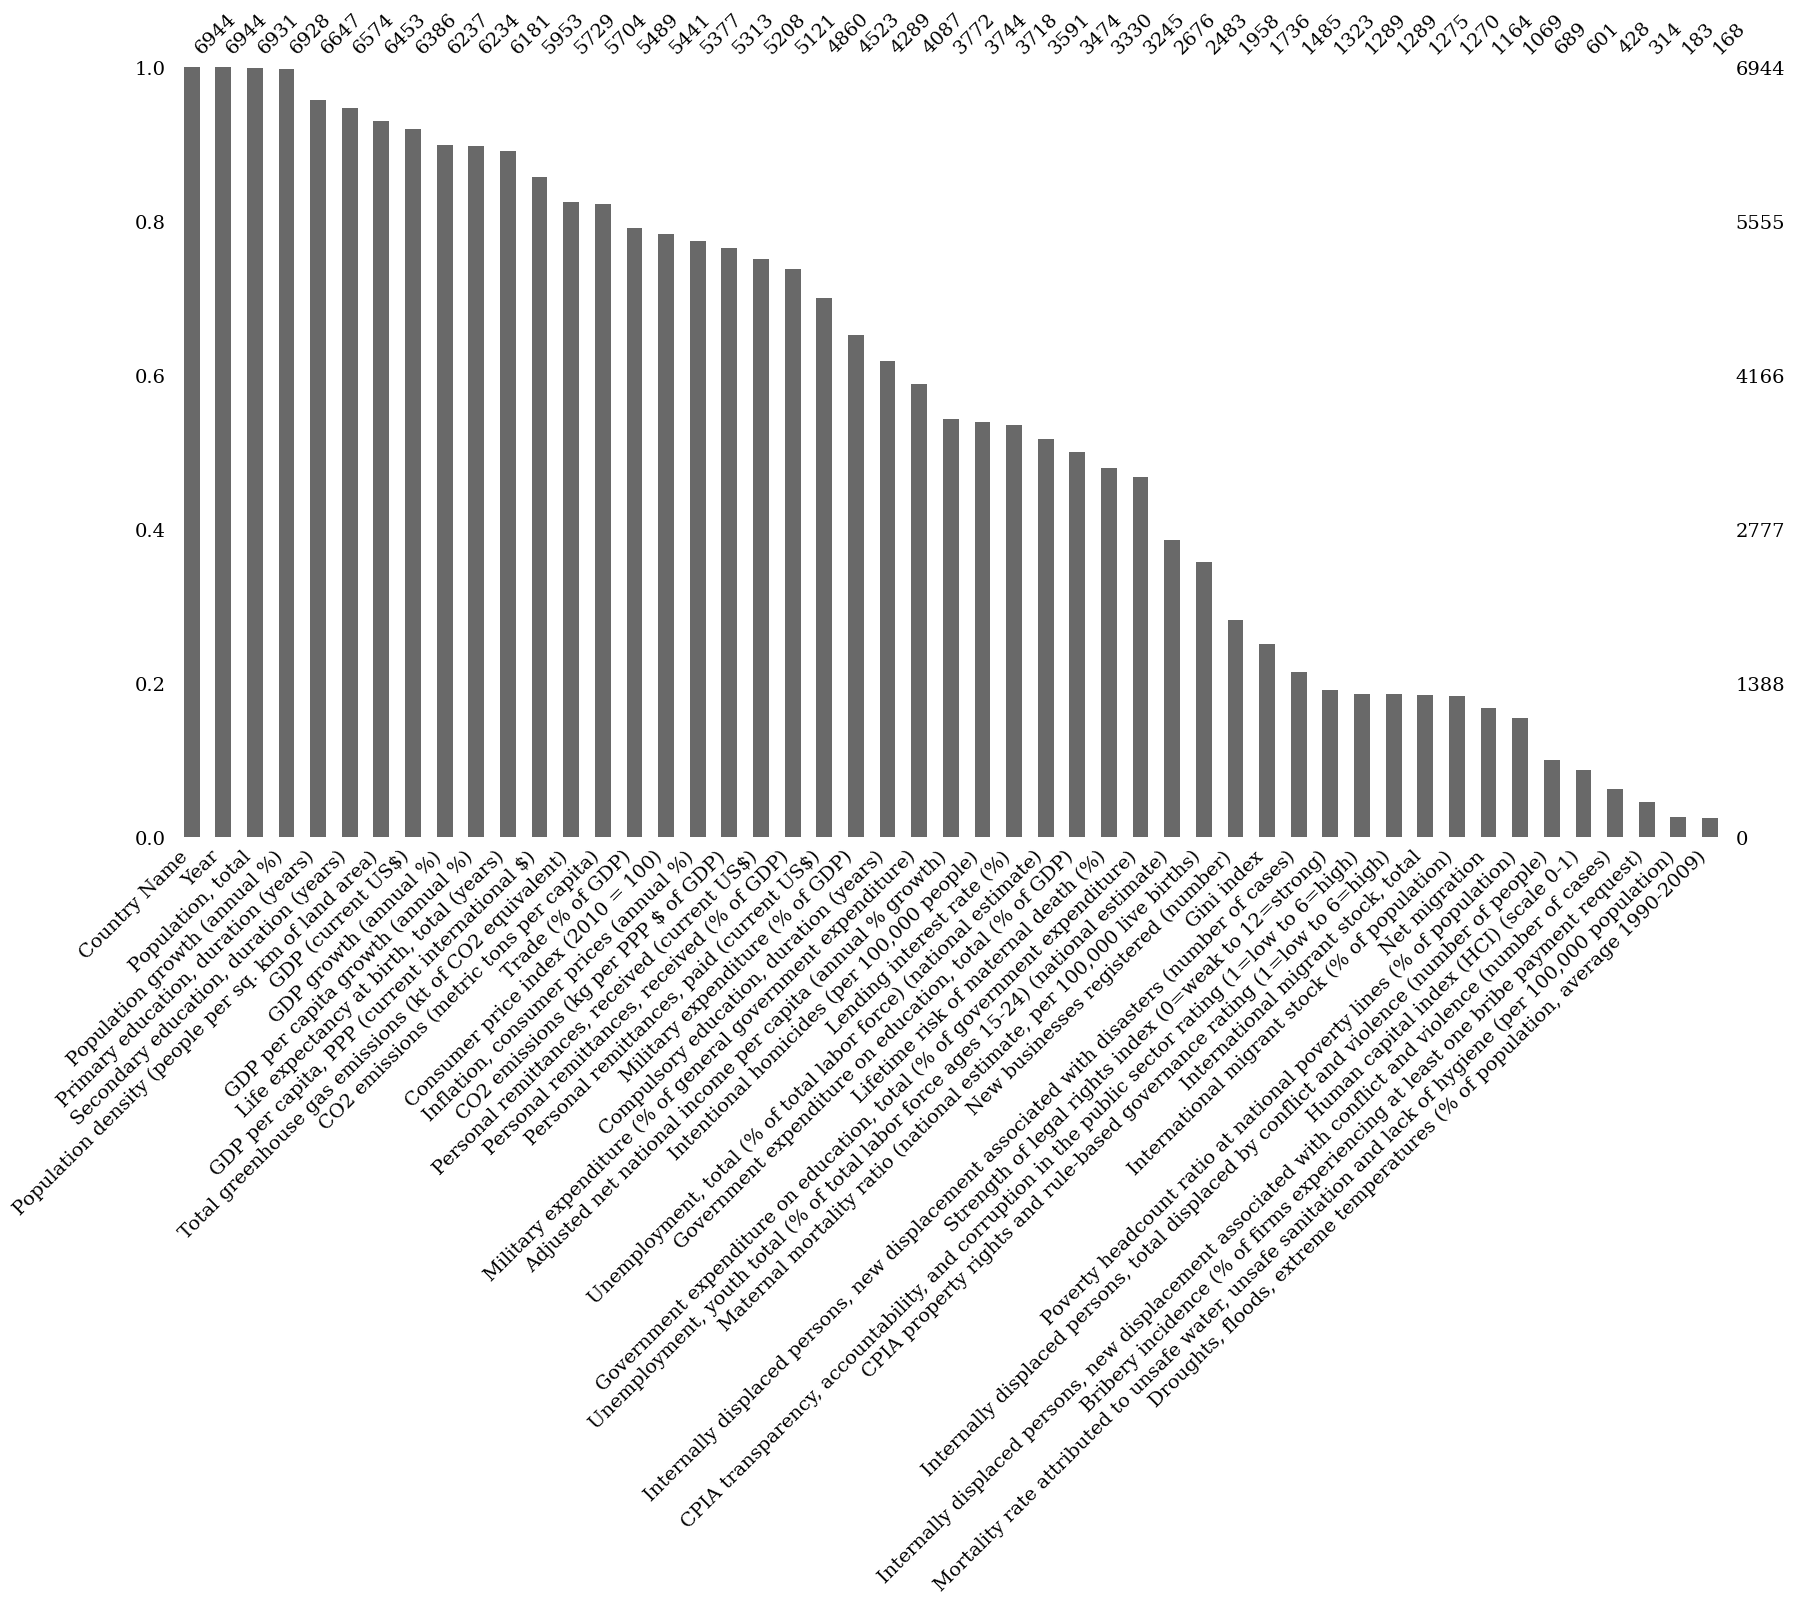

In [ ]:
#@title
m1= msno.bar(df2, sort="descending", figsize=(20,10), fontsize=14 )
plt.show()

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

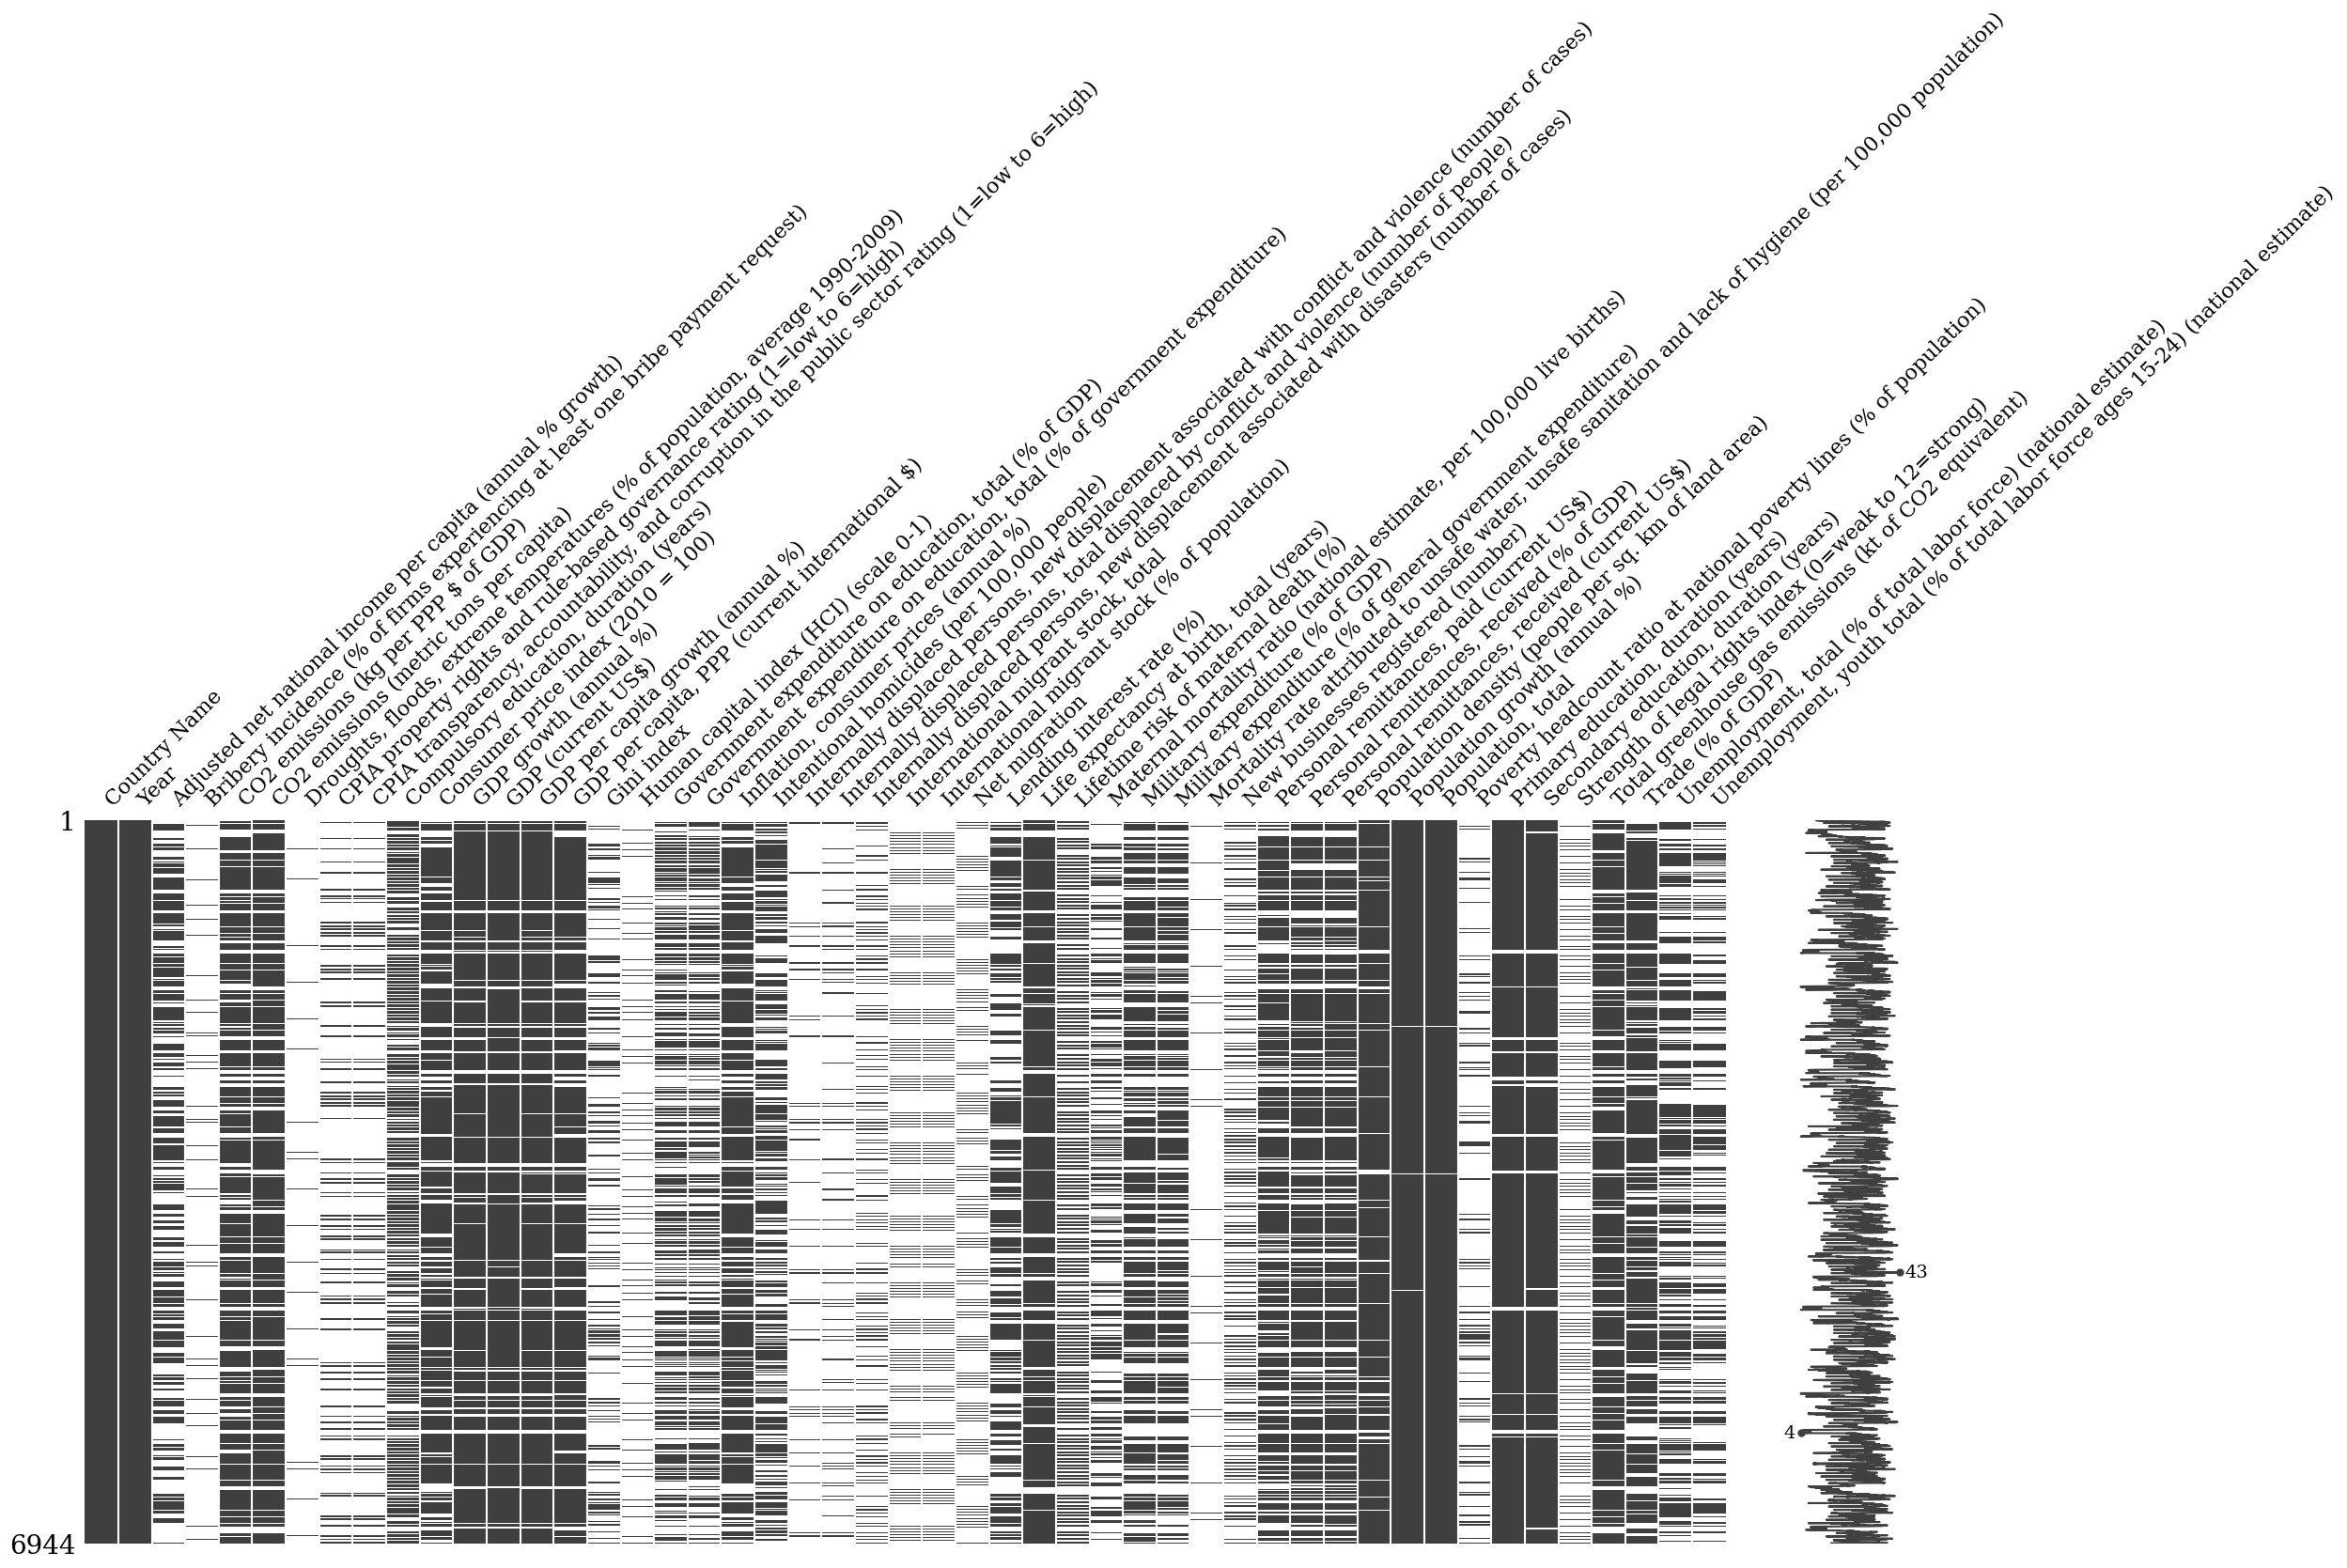

In [ ]:
#@title
msno.matrix(df2)
plt


### Export to CSV file: wolrd_development_indicators_47_clean.csv

In [ ]:
#@title
from google.colab import files

df2.to_csv("wolrd_development_indicators_47_clean.csv", index = False, encoding = 'utf-8-sig')
#remove comment to download dataset
files.download("wolrd_development_indicators_47_clean.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Destination total and origin total datasets

In [ ]:
#@title
df_destination_total = df_clean.groupby(["destination","year"], as_index=False).agg({"migrant_stock": np.sum})

# https://pandas.pydata.org/docs/getting_started/comparison/comparison_with_sql.html
#https://stackoverflow.com/questions/10373660/converting-a-pandas-groupby-output-from-series-to-dataframe

In [ ]:
df_destination_total

,destination,year,migrant_stock
0,Afghanistan,1990,50671
1,Afghanistan,1995,55794
2,Afghanistan,2000,60918
3,Afghanistan,2005,67045
4,Afghanistan,2010,73174
...,...,...,...
1590,Zimbabwe,2000,361947
1591,Zimbabwe,2005,319910
1592,Zimbabwe,2010,286642
1593,Zimbabwe,2015,288208


In [ ]:
#@title
df_origin_total = df_clean.groupby(["origin","year"], as_index=False).agg({"migrant_stock": np.sum})

# https://pandas.pydata.org/docs/getting_started/comparison/comparison_with_sql.html
#https://stackoverflow.com/questions/10373660/converting-a-pandas-groupby-output-from-series-to-dataframe

### Export destination total and origin total datasets

In [ ]:
#@title
from google.colab import files

df_destination_total.to_csv("destination_total.csv", index = False, encoding = 'utf-8-sig')
#remove comment to download dataset
# files.download("destination_total.csv")


df_origin_total.to_csv("origin_total.csv", index = False, encoding = 'utf-8-sig')
#remove comment to download dataset
# files.download("origin_total.csv")

### Merge UN destination_total migrant stock with World Development Indicators

In [ ]:
#@title

df_destination_total

,destination,year,migrant_stock
0,Afghanistan,1990,50671
1,Afghanistan,1995,55794
2,Afghanistan,2000,60918
3,Afghanistan,2005,67045
4,Afghanistan,2010,73174
...,...,...,...
1590,Zimbabwe,2000,361947
1591,Zimbabwe,2005,319910
1592,Zimbabwe,2010,286642
1593,Zimbabwe,2015,288208


In [ ]:
#@title
df_destination_total_temp = df_destination_total.rename(columns={"destination": "Country Name", "year": "Year", "migrant_stock": "Destination migrant stock, total"})

In [ ]:
#@title
df_destination_total_temp

,Country Name,Year,"Destination migrant stock, total"
0,Afghanistan,1990,50671
1,Afghanistan,1995,55794
2,Afghanistan,2000,60918
3,Afghanistan,2005,67045
4,Afghanistan,2010,73174
...,...,...,...
1590,Zimbabwe,2000,361947
1591,Zimbabwe,2005,319910
1592,Zimbabwe,2010,286642
1593,Zimbabwe,2015,288208


In [ ]:
#@title
df_origin_total_temp = df_origin_total.rename(columns={"origin": "Country Name", "year": "Year", "migrant_stock": "Origin migrant stock, total"})

In [ ]:
#@title
df_origin_total_temp

,Country Name,Year,"Origin migrant stock, total"
0,Afghanistan,1990,7679582
1,Afghanistan,1995,4347049
2,Afghanistan,2000,4750677
3,Afghanistan,2005,4116739
4,Afghanistan,2010,5269518
...,...,...,...
1612,Zimbabwe,2000,351985
1613,Zimbabwe,2005,500773
1614,Zimbabwe,2010,754643
1615,Zimbabwe,2015,1167064


In [ ]:
#@title
df_indicators = df2.copy()
df_indicators.head()

,Country Name,Year,Adjusted net national income per capita (annual % growth),Bribery incidence (% of firms experiencing at least one bribe payment request),CO2 emissions (kg per PPP $ of GDP),CO2 emissions (metric tons per capita),"Droughts, floods, extreme temperatures (% of population, average 1990-2009)",CPIA property rights and rule-based governance rating (1=low to 6=high),"CPIA transparency, accountability, and corruption in the public sector rating (1=low to 6=high)","Compulsory education, duration (years)",...,Population growth (annual %),"Population, total",Poverty headcount ratio at national poverty lines (% of population),"Primary education, duration (years)","Secondary education, duration (years)",Strength of legal rights index (0=weak to 12=strong),Total greenhouse gas emissions (kt of CO2 equivalent),Trade (% of GDP),"Unemployment, total (% of total labor force) (national estimate)","Unemployment, youth total (% of total labor force ages 15-24) (national estimate)"
0,Afghanistan,1990,NaN,NaN,NaN,0.191745115,NaN,NaN,NaN,NaN,...,4.47695438,12412311,NaN,6,6,NaN,11970,NaN,NaN,NaN
1,Afghanistan,1991,NaN,NaN,NaN,0.1676815788,NaN,NaN,NaN,NaN,...,6.900124486,13299016,NaN,6,6,NaN,12199.99981,NaN,NaN,NaN
2,Afghanistan,1992,NaN,NaN,NaN,0.09595774214,NaN,NaN,NaN,NaN,...,8.546107005,14485543,NaN,6,6,NaN,11420.00008,NaN,NaN,NaN
3,Afghanistan,1993,NaN,NaN,NaN,0.08472111043,NaN,NaN,NaN,NaN,...,8.790896707,15816601,NaN,6,6,NaN,11500,NaN,NaN,NaN
4,Afghanistan,1994,NaN,NaN,NaN,0.07554582739,NaN,NaN,NaN,NaN,...,7.659795534,17075728,NaN,6,6,NaN,11539.99996,NaN,NaN,NaN


In [ ]:
#@title
df_indicators.shape

(6944, 49)

In [ ]:
df_destination_total_temp.head()



,Country Name,Year,"Destination migrant stock, total"
0,Afghanistan,1990,50671
1,Afghanistan,1995,55794
2,Afghanistan,2000,60918
3,Afghanistan,2005,67045
4,Afghanistan,2010,73174


In [ ]:
#@title
df_destination_total_temp.shape

(1595, 3)

In [ ]:
#@title
df_destination_total_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1595 entries, 0 to 1594
Data columns (total 3 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Country Name                      1595 non-null   object
 1   Year                              1595 non-null   object
 2   Destination migrant stock, total  1595 non-null   Int64 
dtypes: Int64(1), object(2)
memory usage: 39.1+ KB


In [ ]:
#@title
df_indicators.dtypes.head(4)

Country Name                                                                      object
Year                                                                               int64
Adjusted net national income per capita (annual % growth)                         object
Bribery incidence (% of firms experiencing at least one bribe payment request)    object
dtype: object

In [ ]:
#@title
#change Year to object
df_indicators["Year"]= df_indicators["Year"].astype(str)


In [ ]:
#@title
df_indicators.dtypes.head(4)

Country Name                                                                      object
Year                                                                              object
Adjusted net national income per capita (annual % growth)                         object
Bribery incidence (% of firms experiencing at least one bribe payment request)    object
dtype: object

### Fixing issue with countries names

In [ ]:
#@title
df_indicators.head(4)

,Country Name,Year,Adjusted net national income per capita (annual % growth),Bribery incidence (% of firms experiencing at least one bribe payment request),CO2 emissions (kg per PPP $ of GDP),CO2 emissions (metric tons per capita),"Droughts, floods, extreme temperatures (% of population, average 1990-2009)",CPIA property rights and rule-based governance rating (1=low to 6=high),"CPIA transparency, accountability, and corruption in the public sector rating (1=low to 6=high)","Compulsory education, duration (years)",...,Population growth (annual %),"Population, total",Poverty headcount ratio at national poverty lines (% of population),"Primary education, duration (years)","Secondary education, duration (years)",Strength of legal rights index (0=weak to 12=strong),Total greenhouse gas emissions (kt of CO2 equivalent),Trade (% of GDP),"Unemployment, total (% of total labor force) (national estimate)","Unemployment, youth total (% of total labor force ages 15-24) (national estimate)"
0,Afghanistan,1990,NaN,NaN,NaN,0.191745115,NaN,NaN,NaN,NaN,...,4.47695438,12412311,NaN,6,6,NaN,11970,NaN,NaN,NaN
1,Afghanistan,1991,NaN,NaN,NaN,0.1676815788,NaN,NaN,NaN,NaN,...,6.900124486,13299016,NaN,6,6,NaN,12199.99981,NaN,NaN,NaN
2,Afghanistan,1992,NaN,NaN,NaN,0.09595774214,NaN,NaN,NaN,NaN,...,8.546107005,14485543,NaN,6,6,NaN,11420.00008,NaN,NaN,NaN
3,Afghanistan,1993,NaN,NaN,NaN,0.08472111043,NaN,NaN,NaN,NaN,...,8.790896707,15816601,NaN,6,6,NaN,11500,NaN,NaN,NaN


In [ ]:
#@title
df_indicators.dtypes.head(4)

Country Name                                                                      object
Year                                                                              object
Adjusted net national income per capita (annual % growth)                         object
Bribery incidence (% of firms experiencing at least one bribe payment request)    object
dtype: object

In [ ]:
df_destination_total_temp.head(4)

,Country Name,Year,"Destination migrant stock, total"
0,Afghanistan,1990,50671
1,Afghanistan,1995,55794
2,Afghanistan,2000,60918
3,Afghanistan,2005,67045


In [ ]:
#@title
df_destination_total_temp.dtypes.head(4)

Country Name                        object
Year                                object
Destination migrant stock, total     Int64
dtype: object

In [ ]:
#@title
df_origin_total_temp.dtypes.head(4)

Country Name                   object
Year                           object
Origin migrant stock, total     Int64
dtype: object

In [ ]:
#@title
countries = sorted(df_indicators["Country Name"].unique())

In [ ]:
#@title
sorted(countries)

['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas, The',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Channel Islands',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt, Arab Rep.',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Faroe Islands',
 'Fiji',
 'Finland',
 'France',
 'Fren

In [ ]:
countries2 = sorted(df_destination_total_temp["Country Name"].unique())

In [ ]:
sorted(countries2)

['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia (Plurinational State of)',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Channel Islands',
 'Chile',
 'China',
 'China, Hong Kong SAR',
 'China, Macao SAR',
 'Colombia',
 'Comoros',
 'Congo',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curaçao',
 'Cyprus',
 'Czechia',
 "Côte d'Ivoire",
 "Dem. People's Republic of Korea",
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador

In [ ]:
#@title
countries_ind_df = ['Afghanistan',
'Albania',
'Algeria',
'American Samoa',
'Andorra',
'Angola',
'Antigua and Barbuda',
'Argentina',
'Armenia',
'Aruba',
'Australia',
'Austria',
'Azerbaijan',
'Bahamas, The',
'Bahrain',
'Bangladesh',
'Barbados',
'Belarus',
'Belgium',
'Belize',
'Benin',
'Bermuda',
'Bhutan',
'Bolivia',
'Bosnia and Herzegovina',
'Botswana',
'Brazil',
'British Virgin Islands',
'Brunei Darussalam',
'Bulgaria',
'Burkina Faso',
'Burundi',
'Cabo Verde',
'Cambodia',
'Cameroon',
'Canada',
'Cayman Islands',
'Central African Republic',
'Chad',
'Channel Islands',
'Chile',
'China',
'Colombia',
'Comoros',
'Congo, Dem. Rep.',
'Congo, Rep.',
'Costa Rica',
"Cote d'Ivoire",
'Croatia',
'Cuba',
'Curacao',
'Cyprus',
'Czechia',
'Denmark',
'Djibouti',
'Dominica',
'Dominican Republic',
'Ecuador',
'Egypt, Arab Rep.',
'El Salvador',
'Equatorial Guinea',
'Eritrea',
'Estonia',
'Eswatini',
'Ethiopia',
'Faroe Islands',
'Fiji',
'Finland',
'France',
'French Polynesia',
'Gabon',
'Gambia, The',
'Georgia',
'Germany',
'Ghana',
'Gibraltar',
'Greece',
'Greenland',
'Grenada',
'Guam',
'Guatemala',
'Guinea',
'Guinea-Bissau',
'Guyana',
'Haiti',
'Honduras',
'Hong Kong SAR, China',
'Hungary',
'Iceland',
'India',
'Indonesia',
'Iran, Islamic Rep.',
'Iraq',
'Ireland',
'Isle of Man',
'Israel',
'Italy',
'Jamaica',
'Japan',
'Jordan',
'Kazakhstan',
'Kenya',
'Kiribati',
"Korea, Dem. People's Rep.",
'Korea, Rep.',
'Kosovo',
'Kuwait',
'Kyrgyz Republic',
'Lao PDR',
'Latvia',
'Lebanon',
'Lesotho',
'Liberia',
'Libya',
'Liechtenstein',
'Lithuania',
'Luxembourg',
'Macao SAR, China',
'Madagascar',
'Malawi',
'Malaysia',
'Maldives',
'Mali',
'Malta',
'Marshall Islands',
'Mauritania',
'Mauritius',
'Mexico',
'Micronesia, Fed. Sts.',
'Moldova',
'Monaco',
'Mongolia',
'Montenegro',
'Morocco',
'Mozambique',
'Myanmar',
'Namibia',
'Nauru',
'Nepal',
'Netherlands',
'New Caledonia',
'New Zealand',
'Nicaragua',
'Niger',
'Nigeria',
'North Macedonia',
'Northern Mariana Islands',
'Norway',
'Oman',
'Pakistan',
'Palau',
'Panama',
'Papua New Guinea',
'Paraguay',
'Peru',
'Philippines',
'Poland',
'Portugal',
'Puerto Rico',
'Qatar',
'Romania',
'Russian Federation',
'Rwanda',
'Samoa',
'San Marino',
'Sao Tome and Principe',
'Saudi Arabia',
'Senegal',
'Serbia',
'Seychelles',
'Sierra Leone',
'Singapore',
'Sint Maarten (Dutch part)',
'Slovak Republic',
'Slovenia',
'Solomon Islands',
'Somalia',
'South Africa',
'South Sudan',
'Spain',
'Sri Lanka',
'St. Kitts and Nevis',
'St. Lucia',
'St. Martin (French part)',
'St. Vincent and the Grenadines',
'Sudan',
'Suriname',
'Sweden',
'Switzerland',
'Syrian Arab Republic',
'Tajikistan',
'Tanzania',
'Thailand',
'Timor-Leste',
'Togo',
'Tonga',
'Trinidad and Tobago',
'Tunisia',
'Turkiye',
'Turkmenistan',
'Turks and Caicos Islands',
'Tuvalu',
'Uganda',
'Ukraine',
'United Arab Emirates',
'United Kingdom',
'United States',
'Uruguay',
'Uzbekistan',
'Vanuatu',
'Venezuela, RB',
'Vietnam',
'Virgin Islands (U.S.)',
'West Bank and Gaza',
'Yemen, Rep.',
'Zambia',
'Zimbabwe']

In [ ]:

countries_dest_df = ["Afghanistan",
"Albania",
"Algeria",
"American Samoa",
"Andorra",
"Angola",
"Antigua and Barbuda",
"Argentina",
"Armenia",
"Aruba",
"Australia",
"Austria",
"Azerbaijan",
"Bahamas",
"Bahrain",
"Bangladesh",
"Barbados",
"Belarus",
"Belgium",
"Belize",
"Benin",
"Bermuda",
"Bhutan",
"Bolivia (Plurinational State of)",
"Bosnia and Herzegovina",
"Botswana",
"Brazil",
"British Virgin Islands",
"Brunei Darussalam",
"Bulgaria",
"Burkina Faso",
"Burundi",
"Cabo Verde",
"Cambodia",
"Cameroon",
"Canada",
"Cayman Islands",
"Central African Republic",
"Chad",
"Channel Islands",
"Chile",
"China",
"Colombia",
"Comoros",
"Democratic Republic of the Congo",
"Congo",
"Costa Rica",
"Côte d'Ivoire",
"Croatia",
"Cuba",
"Curaçao",
"Cyprus",
"Czechia",
"Denmark",
"Djibouti",
"Dominica",
"Dominican Republic",
"Ecuador",
"Egypt",
"El Salvador",
"Equatorial Guinea",
"Eritrea",
"Estonia",
"Eswatini",
"Ethiopia",
"Faroe Islands",
"Fiji",
"Finland",
"France",
"French Polynesia",
"Gabon",
"Gambia",
"Georgia",
"Germany",
"Ghana",
"Gibraltar",
"Greece",
"Greenland",
"Grenada",
"Guam",
"Guatemala",
"Guinea",
"Guinea-Bissau",
"Guyana",
"Haiti",
"Honduras",
"China Hong Kong SAR",
"Hungary",
"Iceland",
"India",
"Indonesia",
"Iran (Islamic Republic of)",
"Iraq",
"Ireland",
"Isle of Man",
"Israel",
"Italy",
"Jamaica",
"Japan",
"Jordan",
"Kazakhstan",
"Kenya",
"Kiribati",
"Dem. People's Republic of Korea",
"Republic of Korea",
"Kosovo",
"Kuwait",
"Kyrgyzstan",
"Lao People's Democratic Republic",
"Latvia",
"Lebanon",
"Lesotho",
"Liberia",
"Libya",
"Liechtenstein",
"Lithuania",
"Luxembourg",
"China Macao SAR",
"Madagascar",
"Malawi",
"Malaysia",
"Falkland Islands (Malvinas)",
"Mali",
"Malta",
"Marshall Islands",
"Mauritania",
"Mauritius",
"Mexico",
"Micronesia (Fed. States of)",
"Republic of Moldova",
"Monaco",
"Mongolia",
"Montenegro",
"Morocco",
"Mozambique",
"Myanmar",
"Namibia",
"Nauru",
"Nepal",
"Netherlands",
"New Caledonia",
"New Zealand",
"Nicaragua",
"Niger",
"Nigeria",
"North Macedonia",
"Northern Mariana Islands",
"Norway",
"Oman",
"Pakistan",
"Palau",
"Panama",
"Papua New Guinea",
"Paraguay",
"Peru",
"Philippines",
"Poland",
"Portugal",
"Puerto Rico",
"Qatar",
"Romania",
"Russian Federation",
"Rwanda",
"Samoa",
"San Marino",
"Sao Tome and Principe",
"Saudi Arabia",
"Senegal",
"Serbia",
"Seychelles",
"Sierra Leone",
"Singapore",
"Sint Maarten (Dutch part)",
"Slovakia",
"Slovenia",
"Solomon Islands",
"Somalia",
"South Africa",
"South Sudan",
"Spain",
"Sri Lanka",
"Saint Kitts and Nevis",
"Saint Lucia",
"St. Martin (French part)",
"Saint Vincent and the Grenadines",
"Sudan",
"Suriname",
"Sweden",
"Switzerland",
"Syrian Arab Republic",
"Tajikistan",
"United Republic of Tanzania",
"Thailand",
"Timor-Leste",
"Togo",
"Tonga",
"Trinidad and Tobago",
"Tunisia",
"Turkey",
"Turkmenistan",
"Turks and Caicos Islands",
"Tuvalu",
"Uganda",
"Ukraine",
"United Arab Emirates",
"United Kingdom",
"United States of America",
"Uruguay",
"Uzbekistan",
"Vanuatu",
"Venezuela (Bolivarian Republic of)",
"Viet Nam",
"United States Virgin Islands",
"State of Palestine",
"Yemen",
"Zambia",
"Zimbabwe"]

In [ ]:
len(countries_ind_df)



217

In [ ]:
len(countries_dest_df)

217

In [ ]:
old_values = countries_ind_df
new_values = countries_dest_df
country_dict = dictionary = dict(zip(old_values, new_values))

#https://stackoverflow.com/a/209854/15333580


In [ ]:

country_dict

{'Afghanistan': 'Afghanistan',
 'Albania': 'Albania',
 'Algeria': 'Algeria',
 'American Samoa': 'American Samoa',
 'Andorra': 'Andorra',
 'Angola': 'Angola',
 'Antigua and Barbuda': 'Antigua and Barbuda',
 'Argentina': 'Argentina',
 'Armenia': 'Armenia',
 'Aruba': 'Aruba',
 'Australia': 'Australia',
 'Austria': 'Austria',
 'Azerbaijan': 'Azerbaijan',
 'Bahamas, The': 'Bahamas',
 'Bahrain': 'Bahrain',
 'Bangladesh': 'Bangladesh',
 'Barbados': 'Barbados',
 'Belarus': 'Belarus',
 'Belgium': 'Belgium',
 'Belize': 'Belize',
 'Benin': 'Benin',
 'Bermuda': 'Bermuda',
 'Bhutan': 'Bhutan',
 'Bolivia': 'Bolivia (Plurinational State of)',
 'Bosnia and Herzegovina': 'Bosnia and Herzegovina',
 'Botswana': 'Botswana',
 'Brazil': 'Brazil',
 'British Virgin Islands': 'British Virgin Islands',
 'Brunei Darussalam': 'Brunei Darussalam',
 'Bulgaria': 'Bulgaria',
 'Burkina Faso': 'Burkina Faso',
 'Burundi': 'Burundi',
 'Cabo Verde': 'Cabo Verde',
 'Cambodia': 'Cambodia',
 'Cameroon': 'Cameroon',
 'Canada'

### Mapping countries names

In [ ]:
test = df_indicators.copy()

In [ ]:
test["Country Name"].replace(country_dict, inplace=True)

# https://stackoverflow.com/questions/20250771/remap-values-in-pandas-column-with-a-dict-preserve-nans

In [ ]:
test

,Country Name,Year,Adjusted net national income per capita (annual % growth),Bribery incidence (% of firms experiencing at least one bribe payment request),CO2 emissions (kg per PPP $ of GDP),CO2 emissions (metric tons per capita),"Droughts, floods, extreme temperatures (% of population, average 1990-2009)",CPIA property rights and rule-based governance rating (1=low to 6=high),"CPIA transparency, accountability, and corruption in the public sector rating (1=low to 6=high)","Compulsory education, duration (years)",...,Population growth (annual %),"Population, total",Poverty headcount ratio at national poverty lines (% of population),"Primary education, duration (years)","Secondary education, duration (years)",Strength of legal rights index (0=weak to 12=strong),Total greenhouse gas emissions (kt of CO2 equivalent),Trade (% of GDP),"Unemployment, total (% of total labor force) (national estimate)","Unemployment, youth total (% of total labor force ages 15-24) (national estimate)"
0,Afghanistan,1990,NaN,NaN,NaN,0.191745115,NaN,NaN,NaN,NaN,...,4.47695438,12412311,NaN,6,6,NaN,11970,NaN,NaN,NaN
1,Afghanistan,1991,NaN,NaN,NaN,0.1676815788,NaN,NaN,NaN,NaN,...,6.900124486,13299016,NaN,6,6,NaN,12199.99981,NaN,NaN,NaN
2,Afghanistan,1992,NaN,NaN,NaN,0.09595774214,NaN,NaN,NaN,NaN,...,8.546107005,14485543,NaN,6,6,NaN,11420.00008,NaN,NaN,NaN
3,Afghanistan,1993,NaN,NaN,NaN,0.08472111043,NaN,NaN,NaN,NaN,...,8.790896707,15816601,NaN,6,6,NaN,11500,NaN,NaN,NaN
4,Afghanistan,1994,NaN,NaN,NaN,0.07554582739,NaN,NaN,NaN,NaN,...,7.659795534,17075728,NaN,6,6,NaN,11539.99996,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6939,Zimbabwe,2017,1.972763753,NaN,0.3006134311,0.7262970709,NaN,2,2,7,...,1.459405813,14236599,30.4,7,6,5,28299.99924,50.02971226,NaN,NaN
6940,Zimbabwe,2018,-6.708681629,NaN,0.3353463132,0.8574112686,NaN,2,2.5,7,...,1.410381542,14438812,NaN,7,6,5,30829.99992,69.44702132,NaN,NaN
6941,Zimbabwe,2019,NaN,NaN,0.3334414884,0.8029785196,NaN,2,2.5,7,...,1.421141886,14645473,38.3,7,6,6,30530.00069,63.28191518,7.369999886,11.85999966
6942,Zimbabwe,2020,NaN,NaN,NaN,NaN,NaN,2,2.5,7,...,1.473871416,14862927,NaN,7,6,NaN,NaN,76.00193836,NaN,NaN


In [ ]:
countries3 = sorted(test["Country Name"].unique())

In [ ]:
sorted(countries3)

['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia (Plurinational State of)',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Channel Islands',
 'Chile',
 'China',
 'China Hong Kong SAR',
 'China Macao SAR',
 'Colombia',
 'Comoros',
 'Congo',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curaçao',
 'Cyprus',
 'Czechia',
 "Côte d'Ivoire",
 "Dem. People's Republic of Korea",
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritr

In [ ]:
len(countries3)

217

In [ ]:
 merged_data = pd.merge(test, df_destination_total_temp,on=['Country Name','Year'],how='left')



 #https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.merge.html

In [ ]:
merged_data.shape

(6944, 50)

In [ ]:
merged_data.head()

,Country Name,Year,Adjusted net national income per capita (annual % growth),Bribery incidence (% of firms experiencing at least one bribe payment request),CO2 emissions (kg per PPP $ of GDP),CO2 emissions (metric tons per capita),"Droughts, floods, extreme temperatures (% of population, average 1990-2009)",CPIA property rights and rule-based governance rating (1=low to 6=high),"CPIA transparency, accountability, and corruption in the public sector rating (1=low to 6=high)","Compulsory education, duration (years)",...,"Population, total",Poverty headcount ratio at national poverty lines (% of population),"Primary education, duration (years)","Secondary education, duration (years)",Strength of legal rights index (0=weak to 12=strong),Total greenhouse gas emissions (kt of CO2 equivalent),Trade (% of GDP),"Unemployment, total (% of total labor force) (national estimate)","Unemployment, youth total (% of total labor force ages 15-24) (national estimate)","Destination migrant stock, total"
0,Afghanistan,1990,NaN,NaN,NaN,0.191745115,NaN,NaN,NaN,NaN,...,12412311,NaN,6,6,NaN,11970,NaN,NaN,NaN,50671
1,Afghanistan,1991,NaN,NaN,NaN,0.1676815788,NaN,NaN,NaN,NaN,...,13299016,NaN,6,6,NaN,12199.99981,NaN,NaN,NaN,<NA>
2,Afghanistan,1992,NaN,NaN,NaN,0.09595774214,NaN,NaN,NaN,NaN,...,14485543,NaN,6,6,NaN,11420.00008,NaN,NaN,NaN,<NA>
3,Afghanistan,1993,NaN,NaN,NaN,0.08472111043,NaN,NaN,NaN,NaN,...,15816601,NaN,6,6,NaN,11500,NaN,NaN,NaN,<NA>
4,Afghanistan,1994,NaN,NaN,NaN,0.07554582739,NaN,NaN,NaN,NaN,...,17075728,NaN,6,6,NaN,11539.99996,NaN,NaN,NaN,<NA>


In [ ]:
 merged_data2 = pd.merge(merged_data, df_origin_total_temp,on=['Country Name','Year'],how='left')

In [ ]:
countries4 = sorted(merged_data["Country Name"].unique())
len(countries4)

217

In [ ]:
countries5 = sorted(merged_data2["Country Name"].unique())
len(countries5)

217

### Export master dataset for Tableau portion

In [ ]:
from google.colab import files


merged_data2.to_csv("merged_data_for_tableau_world_indicators_origin_destination_clean.csv", index = False, encoding = 'utf-8-sig')
#remove comment to download dataset
# files.download("merged_data_for_tableau_world_indicators_origin_destination_clean.csv")

In [ ]:



url3 = "https://github.com/angelhumano/data_visualization_class_project/blob/main/merged_data_for_tableau_world_indicators_origin_destination_clean.csv?raw=true"
master_data = pd.read_csv(url3)

In [ ]:
master_data.head(4)

,Country Name,Year,Adjusted net national income per capita (annual % growth),Bribery incidence (% of firms experiencing at least one bribe payment request),CO2 emissions (kg per PPP $ of GDP),CO2 emissions (metric tons per capita),"Droughts, floods, extreme temperatures (% of population, average 1990-2009)",CPIA property rights and rule-based governance rating (1=low to 6=high),"CPIA transparency, accountability, and corruption in the public sector rating (1=low to 6=high)","Compulsory education, duration (years)",...,Poverty headcount ratio at national poverty lines (% of population),"Primary education, duration (years)","Secondary education, duration (years)",Strength of legal rights index (0=weak to 12=strong),Total greenhouse gas emissions (kt of CO2 equivalent),Trade (% of GDP),"Unemployment, total (% of total labor force) (national estimate)","Unemployment, youth total (% of total labor force ages 15-24) (national estimate)","Destination migrant stock, total","Origin migrant stock, total"
0,Afghanistan,1990,NaN,NaN,NaN,0.191745,NaN,NaN,NaN,NaN,...,NaN,6.0,6.0,NaN,11970.00000,NaN,NaN,NaN,50671.0,7679582.0
1,Afghanistan,1991,NaN,NaN,NaN,0.167682,NaN,NaN,NaN,NaN,...,NaN,6.0,6.0,NaN,12199.99981,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1992,NaN,NaN,NaN,0.095958,NaN,NaN,NaN,NaN,...,NaN,6.0,6.0,NaN,11420.00008,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1993,NaN,NaN,NaN,0.084721,NaN,NaN,NaN,NaN,...,NaN,6.0,6.0,NaN,11500.00000,NaN,NaN,NaN,NaN,NaN


In [ ]:
sorted(master_data.columns)

['Adjusted net national income per capita (annual % growth)',
 'Bribery incidence (% of firms experiencing at least one bribe payment request)',
 'CO2 emissions (kg per PPP $ of GDP)',
 'CO2 emissions (metric tons per capita)',
 'CPIA property rights and rule-based governance rating (1=low to 6=high)',
 'CPIA transparency, accountability, and corruption in the public sector rating (1=low to 6=high)',
 'Compulsory education, duration (years)',
 'Consumer price index (2010 = 100)',
 'Country Name',
 'Destination migrant stock, total',
 'Droughts, floods, extreme temperatures (% of population, average 1990-2009)',
 'GDP (current US$)',
 'GDP growth (annual %)',
 'GDP per capita growth (annual %)',
 'GDP per capita, PPP (current international $)',
 'Gini index',
 'Government expenditure on education, total (% of GDP)',
 'Government expenditure on education, total (% of government expenditure)',
 'Human capital index (HCI) (scale 0-1)',
 'Inflation, consumer prices (annual %)',
 'Intentiona

In [ ]:
sorted(master_data["Country Name"].unique())

['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia (Plurinational State of)',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Channel Islands',
 'Chile',
 'China',
 'China Hong Kong SAR',
 'China Macao SAR',
 'Colombia',
 'Comoros',
 'Congo',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curaçao',
 'Cyprus',
 'Czechia',
 "Côte d'Ivoire",
 "Dem. People's Republic of Korea",
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritr

-----------------------------------------------------------

## Data Visualizations: Gabriel's Section

In [ ]:
#@title
# Install packages
!pip install pysankey

In [ ]:
#@title
# Import packages

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import the sankey function from the sankey module within pySankey
from pySankey.sankey import sankey

In [ ]:
#@title
# Load data

df = df_clean.copy()

### Sankey Charts

In [ ]:
#@title
#Sankey for US as destination
df_clean = df.groupby(['destination', 'origin'])['migrant_stock'].mean().reset_index()

df_eua = df_clean.loc[df_clean['destination'] == 'United States of America'] \
  .sort_values('migrant_stock', ascending = False).head(10)
df_use = df_eua
df_use




,destination,origin,migrant_stock
11616,United States of America,Mexico,9401802.428571
11556,United States of America,China,1653186.0
11635,United States of America,Puerto Rico,1570661.142857
11632,United States of America,Philippines,1565110.571429
11592,United States of America,India,1504793.142857
11675,United States of America,Viet Nam,1054099.428571
11562,United States of America,Cuba,1007008.285714
11572,United States of America,El Salvador,986684.285714
11636,United States of America,Republic of Korea,913783.857143
11554,United States of America,Canada,816508.0


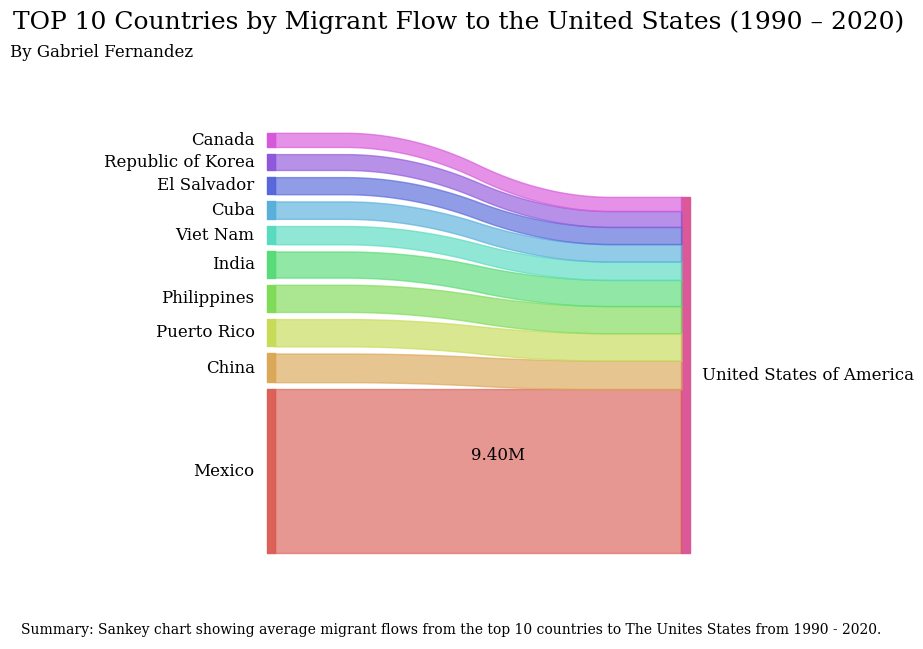

In [ ]:
#@title
# Sankey chart
a = sankey(df_use["origin"],
       df_use["destination"],
       rightWeight=df_use['migrant_stock'].values,
       leftWeight=df_use['migrant_stock'].values,
       fontsize=12)

plt.suptitle("TOP 10 Countries by Migrant Flow to the United States (1990 – 2020)\n\n", y=1.05, x = 0.48, fontsize=18)
plt.title("By Gabriel Fernandez", fontsize=12, y=1.10, x = - 0.31)

txt="""Summary: Sankey chart showing average migrant flows from the top 10 countries to The Unites States from 1990 - 2020."""

plt.figtext(-0.25, 0.01, txt, wrap=True, fontsize=10)
txt1= "9.40M"
plt.figtext(0.5, 0.3, txt1, wrap=True, fontsize=12)
plt.show()


In [ ]:
#@title
#Sankey for Mexico as destination
df_clean = df.groupby(['destination', 'origin'])['migrant_stock'].mean().reset_index()

df_eua = df_clean.loc[df_clean['destination'] == 'Mexico'] \
  .sort_values('migrant_stock', ascending = False).head(10)
df_use = df_eua
df_use

,destination,origin,migrant_stock
7447,Mexico,United States of America,517010.285714
7389,Mexico,El Salvador,50692.571429
7394,Mexico,Guatemala,43133.857143
7437,Mexico,Spain,22333.428571
7449,Mexico,Venezuela (Bolivarian Republic of),15837.428571
7396,Mexico,Honduras,11328.142857
7377,Mexico,Colombia,11173.0
7363,Mexico,Argentina,10319.714286
7380,Mexico,Cuba,8789.714286
7374,Mexico,Canada,7676.714286


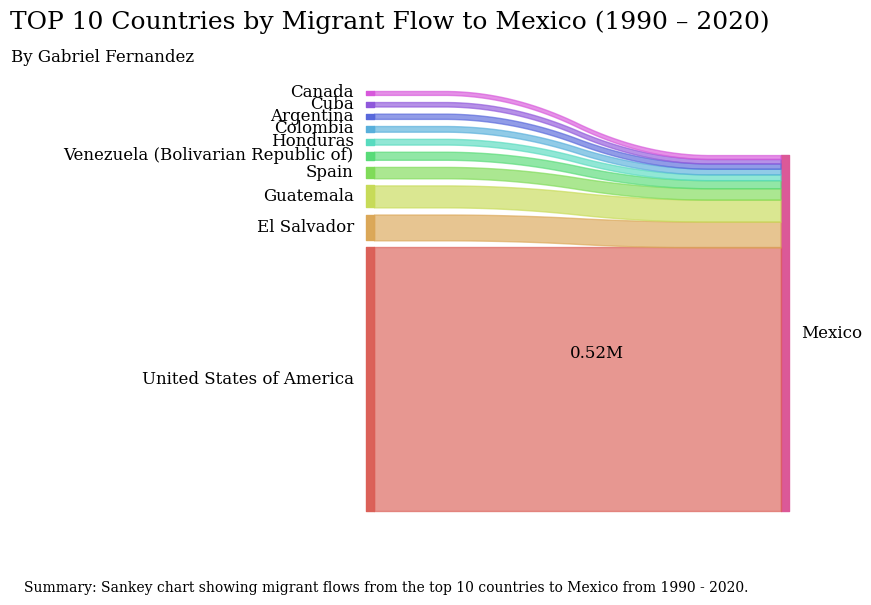

In [ ]:
#@title


# Sankey chart


a = sankey(df_use["origin"],
       df_use["destination"],
       rightWeight=df_use['migrant_stock'].values,
       leftWeight=df_use['migrant_stock'].values,
       fontsize=12)

plt.suptitle("TOP 10 Countries by Migrant Flow to Mexico (1990 – 2020)\n\n",x = 0.20, fontsize=18)
plt.title("By Gabriel Fernandez", fontsize=12, y=1, x = -0.52)

txt="Summary: Sankey chart showing migrant flows from the top 10 countries to Mexico from 1990 - 2020."
plt.figtext(-0.41, 0.01, txt, wrap=True, fontsize=10)
txt1= "0.52M"
plt.figtext(0.5, 0.4, txt1, wrap=True, fontsize=12)
plt.show()


### Slope Charts


In [ ]:
#@title

# For top five destinations
# Load data

df = df_destination_total.copy()
df['year'] = df['year'].astype(int)
df.head(5)

,destination,year,migrant_stock
0,Afghanistan,1990,50671
1,Afghanistan,1995,55794
2,Afghanistan,2000,60918
3,Afghanistan,2005,67045
4,Afghanistan,2010,73174


In [ ]:
# @title
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1595 entries, 0 to 1594
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   destination    1595 non-null   object
 1   year           1595 non-null   int64 
 2   migrant_stock  1595 non-null   Int64 
dtypes: Int64(1), int64(1), object(1)
memory usage: 39.1+ KB


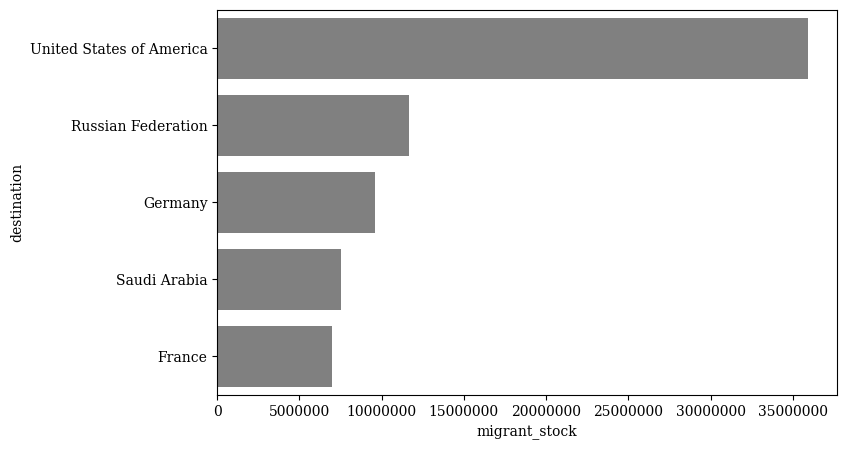

In [ ]:
#@title
# Top 5 destination countries by migrant stock

plt.figure(figsize=(8,5))
d =df.groupby('destination').agg({'migrant_stock': 'mean'})
d =d.sort_values(by='migrant_stock', ascending= False).head(5)
sns.barplot(data = d, y = d.index, x="migrant_stock", color= "gray")
plt.ticklabel_format(style='plain', axis='x')
plt.show()

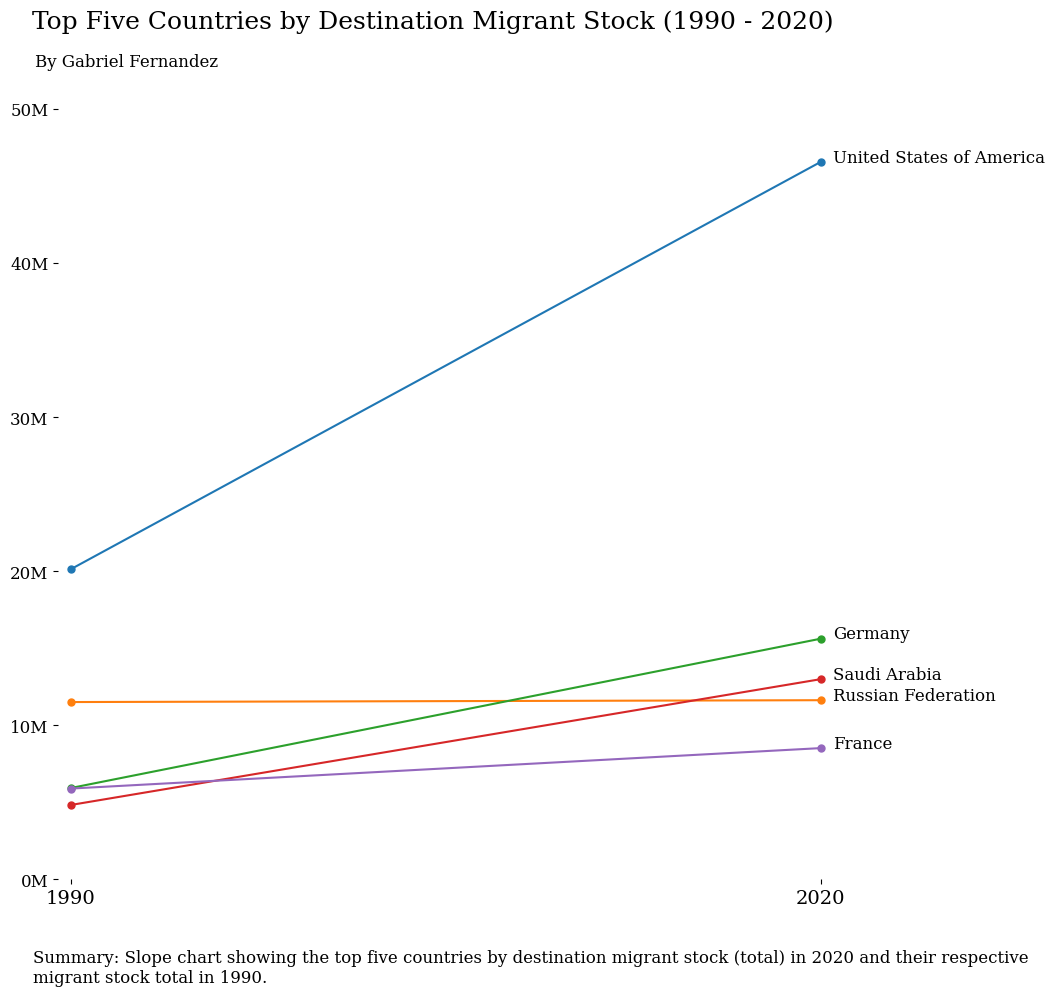

In [ ]:
#@title
countries = list(d.index)
fig, ax = plt.subplots(1, figsize=(10,10))
for i in countries:
    # get a single country from the list
    temp = df[df['destination'] == i]
    # plot the lines
    plt.plot(temp.year.iloc[[0,6]], temp.migrant_stock.iloc[[0,6]], marker='o',markersize=5)

    # end label
    plt.text(temp.year.values[6]+0.5, temp.migrant_stock.values[6], i, fontsize=12)
    # start label
    # plt.text(temp.year.values[0] - 0.5, temp.migrant_stock.values[0], i, ha='right')

# x limits, x ticks, and y label
plt.xlim(1989.5,2020.5)
plt.xticks([1990, 2020])
plt.xticks(fontsize=14)

# get y ticks, replace 1,000 with k, and draw the ticks
yticks = plt.yticks()[0]
plt.yticks(yticks, [f"{(i/1000000):n}M" for i in yticks])
plt.yticks(fontsize=12)
# remove all the spines of the axes
ax.spines["left"].set_color("None")
ax.spines["right"].set_color("None")
ax.spines["top"].set_color("None")
ax.spines["bottom"].set_color("None")

plt.suptitle("Top Five Countries by Destination Migrant Stock (1990 - 2020)\n\n", fontsize=18)
plt.title("By Gabriel Fernandez\n", fontsize=12, loc ="left", y = 1.02, x = -0.03)

txt="Summary: Slope chart showing the top five countries by destination migrant stock (total) in 2020 and their respective migrant stock total in 1990."
plt.figtext(0.10, 0.01, txt, wrap=True, fontsize=12)
plt.show()

In [ ]:
#@title

# For top five origin

# Load data

df_o = df_origin_total.copy()
df_o['year'] = df_o['year'].astype(int)
df_o.head(5)

,origin,year,migrant_stock
0,Afghanistan,1990,7679582
1,Afghanistan,1995,4347049
2,Afghanistan,2000,4750677
3,Afghanistan,2005,4116739
4,Afghanistan,2010,5269518


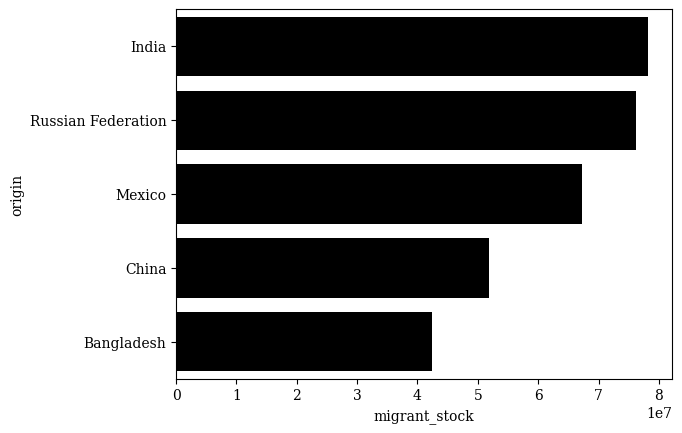

In [ ]:
#@title
# Top 5 origin countries by migrant stock
o =df_o.groupby('origin').agg({'migrant_stock': 'sum'})
o =o.sort_values(by='migrant_stock', ascending= False).head(5)
sns.barplot(data = o, y = o.index, x="migrant_stock", color= "black")
plt.show()

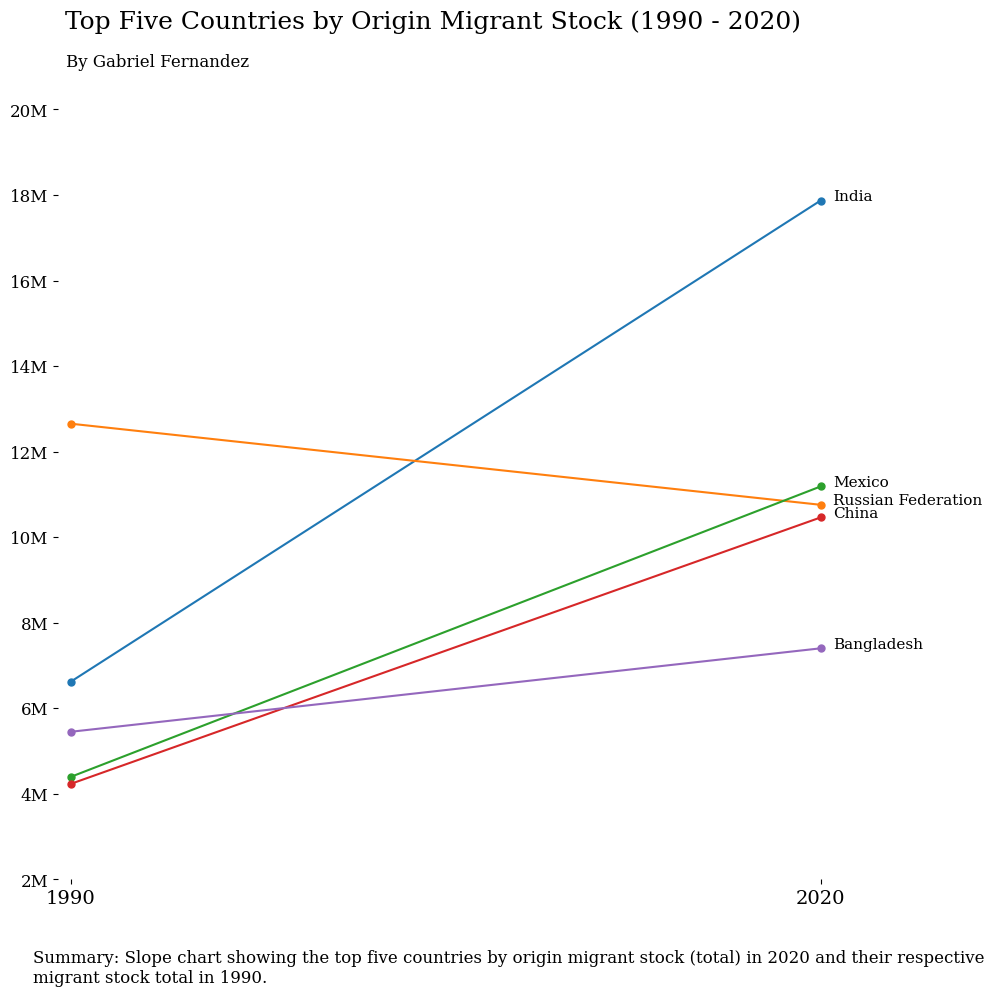

In [ ]:
#@title
countries = list(o.index)
fig, ax = plt.subplots(1, figsize=(10,10))
for i in countries:
    # get a single country from the list
    temp = df_o[df_o['origin'] == i]
    # plot the lines
    plt.plot(temp.year.iloc[[0,6]], temp.migrant_stock.iloc[[0,6]], marker='o',markersize=5)

    # end label
    plt.text(temp.year.values[6]+0.5, temp.migrant_stock.values[6], i, fontsize=11)
    # start label
    # plt.text(temp.year.values[0] - 0.5, temp.migrant_stock.values[0], i, ha='right')

# x limits, x ticks, and y label
plt.xlim(1989.5,2020.5)
plt.xticks([1990, 2020])
plt.xticks(fontsize=14)

# get y ticks, replace 1,000 with k, and draw the ticks
yticks = plt.yticks()[0]


plt.yticks(yticks, [f"{(i/1000000):n}M" for i in yticks])

plt.yticks(fontsize=12)
# remove all the spines of the axes
ax.spines["left"].set_color("None")
ax.spines["right"].set_color("None")
ax.spines["top"].set_color("None")
ax.spines["bottom"].set_color("None")

plt.suptitle("Top Five Countries by Origin Migrant Stock (1990 - 2020)\n\n", fontsize=18)
plt.title("By Gabriel Fernandez\n", fontsize=12, loc ="left", y = 1.02, x = 0.01)

txt="Summary: Slope chart showing the top five countries by origin migrant stock (total) in 2020 and their respective migrant stock total in 1990."
plt.figtext(0.10, 0.01, txt, wrap=True, fontsize=12)
plt.show()

## Reference
- International Migrant Stock: https://www.un.org/development/desa/pd/content/international-migrant-stock

- World Development Indicators: https://databank.worldbank.org/source/world-development-indicators